<a href="https://colab.research.google.com/github/roner-rodrigues/AI-ML/blob/main/MLPRegressor_Ativ_Bloco3_Ressonancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPRegressor # Biblioteca para utilização do Regressor MLP
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Biblioteca utilizada para normalização dos dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn import metrics # Biblioteca para avaliação das métricas no modelo
import matplotlib.pyplot as plt # Para visualizacao dos dados por meio de gráfico
import numpy as np # Biblioteca de manipulação de arrays Numpy
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset
from google.colab import drive # Biblioteca para interação do colab com o drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab
from tabulate import tabulate
import seaborn as sns # Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib.

Mounted at /content/drive


In [6]:
# Carregando os datasets
train_df = pd.read_csv("/content/drive/MyDrive/POS-IA/RNA_Datasets/ressonanciaMLP.csv")
test_df = pd.read_csv("/content/drive/MyDrive/POS-IA/RNA_Datasets/ressonanciaMLPTest.csv")

# Separando os inputs (X) e o alvo (y) do dataset de treino
X_train = train_df.iloc[:, :-1].values  # Todas as colunas, exceto a última
y_train = train_df.iloc[:, -1].values   # Apenas a última coluna

# Separando os inputs (X) e o alvo (y) do dataset de teste
X_test = test_df.iloc[:, :-1].values    # Todas as colunas, exceto a última
y_test = test_df.iloc[:, -1].values     # Apenas a última coluna

# Verificando os formatos
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)

# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

# Gera um gráfico matricial para apresentar a correção entre as variáveis de entrada do dataset
# ax = sns.heatmap(train_df.corr(numeric_only=True), annot=False, cmap=sns.cubehelix_palette(as_cmap=True))
# ax.set_title('Mapa de correlação de todas as variáveis do dataset')
# ax=ax

In [ ]:
# """
# As explicações dos parâmetros de configurações do MLPRegressor podem ser obtidos no link
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
# """
# mlp_reg = MLPRegressor(hidden_layer_sizes=(50), activation='logistic', solver='adam',
#                        max_iter=5000, tol=0.0001, momentum=0.8, early_stopping=True, epsilon=1e-08,
#                        n_iter_no_change=10, random_state=12, verbose=False)

# # Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
# mlp_reg.fit(X_train, y_train)



```
# This is formatted as code
```

# **Exercício nº 1:**

In [7]:
# Configurações experimentais
activations = ['tanh', 'relu', 'logistic']
neurons = [5, 10, 15]
learning_rate = 0.01
max_epochs = 1000

# Variáveis para armazenar resultados
results = []

# Loop para testar as combinações
for activation in activations:
    for neuron in neurons:
        # Configuração da RNA
        mlp_reg = MLPRegressor(
            hidden_layer_sizes=(neuron,),
            activation=activation,
            solver='adam',
            learning_rate_init=learning_rate,
            max_iter=max_epochs,
            random_state=12,
            verbose=False
        )

        # Treinamento
        mlp_reg.fit(X_train, y_train)

        # Avaliação
        y_pred = mlp_reg.predict(X_test)  # Predições no conjunto de teste
        loss = metrics.mean_squared_error(y_test, y_pred)  # Calcula o erro médio quadrático (MSE)

        # Armazena os resultados
        results.append({
            'activation': activation,
            'neurons': neuron,
            'loss': loss
        })


# Encontra a melhor configuração
best_result = min(results, key=lambda x: x['loss'])

# Exibe os resultados
print(f"Melhor Configuração:")
print(f"Função de Ativação: {best_result['activation']}")
print(f"Número de Neurônios: {best_result['neurons']}")
print(f"Perda Final (Loss): {best_result['loss']}")

Melhor Configuração:
Função de Ativação: logistic
Número de Neurônios: 15
Perda Final (Loss): 0.00029184193631271946


In [8]:
# Dados da tabela
data = [
    ["1º (T1)", 5, "tanh", 0.079364163, 10000, 1],
    ["2º (T2)", 5, "relu", 0.082353547, 10000, 2],
    ["3º (T3)", 5, "logistic", 0.023746910, 10000, 3],
    ["4º (T4)", 10, "tanh", 0.001451882, 10000, 4],
    ["5º (T5)", 10, "relu", 0.004387386, 10000, 5],
    ["6º (T6)", 10, "logistic", 0.049371072, 10000, 6],
    ["7º (T7)", 15, "tanh", 0.000944233, 10000, 7],
    ["8º (T8)", 15, "relu", 0.000682435, 10000, 8],
    ["9º (T9)", 15, "logistic", 0.000291841, 10000, 9],
]

# Cabeçalhos da tabela
headers = ["Treinamento", "Neurônios", "Ativação", "Perda Final", "Número de Épocas", "Ranking"]

# Imprime a tabela
print(tabulate(data, headers=headers, tablefmt="pretty"))

+-------------+-----------+----------+-------------+------------------+---------+
| Treinamento | Neurônios | Ativação | Perda Final | Número de Épocas | Ranking |
+-------------+-----------+----------+-------------+------------------+---------+
|   1º (T1)   |     5     |   tanh   | 0.079364163 |      10000       |    1    |
|   2º (T2)   |     5     |   relu   | 0.082353547 |      10000       |    2    |
|   3º (T3)   |     5     | logistic | 0.02374691  |      10000       |    3    |
|   4º (T4)   |    10     |   tanh   | 0.001451882 |      10000       |    4    |
|   5º (T5)   |    10     |   relu   | 0.004387386 |      10000       |    5    |
|   6º (T6)   |    10     | logistic | 0.049371072 |      10000       |    6    |
|   7º (T7)   |    15     |   tanh   | 0.000944233 |      10000       |    7    |
|   8º (T8)   |    15     |   relu   | 0.000682435 |      10000       |    8    |
|   9º (T9)   |    15     | logistic | 0.000291841 |      10000       |    9    |
+-------------+-



```
# This is formatted as code
```

# **Exercício nº 2:**

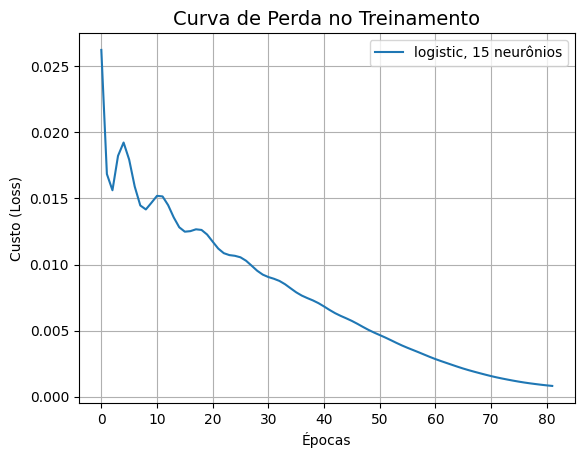

In [9]:
# Treinar a RNA novamente com a melhor configuração
best_activation = best_result['activation']
best_neurons = best_result['neurons']

mlp_reg = MLPRegressor(
    hidden_layer_sizes=(best_neurons,),
    activation=best_activation,
    solver='adam',
    learning_rate_init=learning_rate,
    max_iter=max_epochs,
    random_state=12,
    verbose=False
)

# Treinamento com a melhor configuração
mlp_reg.fit(X_train, y_train)

# Plotar o gráfico de erros (curva de perda)
plt.plot(mlp_reg.loss_curve_, label=f'{best_activation}, {best_neurons} neurônios')
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel("Épocas")
plt.ylabel("Custo (Loss)")
plt.legend()
plt.grid(True)
plt.show()

```
# This is formatted as code
```

# **Exercício nº 3:**

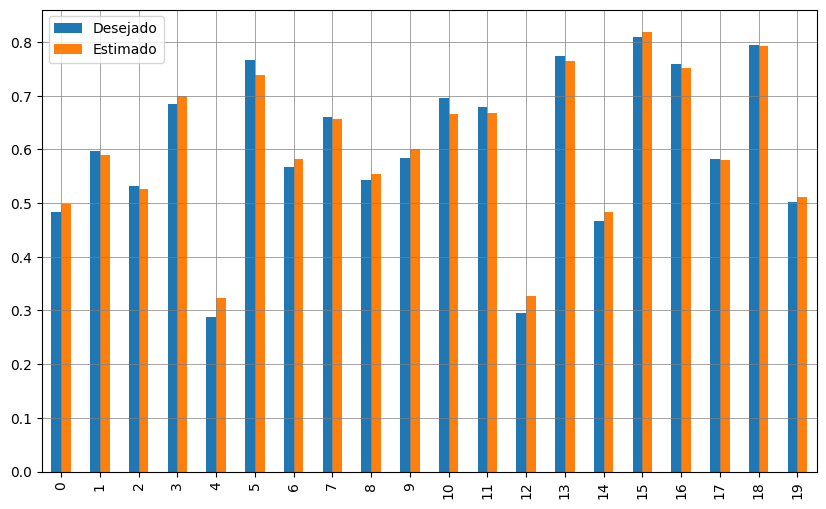

In [14]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg.predict(X_test)
# print(y_pred.shape)
# print(testY.shape)

df_temp = pd.DataFrame({'Desejado': y_test, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(40) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

In [17]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(y_test, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.

Mean Absolute Error (MAE): 0.014102640423535128
Mean Squared Error (MSE): 0.00029184193631271946
Root Mean Squared Error (RMSE): 0.00029184193631271946
Mean Absolute Percentage Error (MAPE): 0.028915915149923678
R2:  0.9864778290079483
